# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/marks_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key = weather_api_key

temp = []
humidity = []
clouds = []
wind = []
country = []
lat = []
lon = []
dates = []
cities_updated = []
city_count = 0
cities_length = len(cities)

query_url = f"{url}appid={api_key}&units={units}&q="

print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    city_count = city_count + 1
    response = requests.get(query_url + city).json()
    #error handling
    try:
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        dates.append(response['dt'])
        cities_updated.append(response['name'])
        print(f"Processing {city_count} of {cities_length} | {city}")
    except KeyError:
        print("City not found. Skipping...")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
weather_dict = {
    "City": cities_updated,
    "Country": country,
    "Date": dates,
    "Max Temp": temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind,
    "Lat": lat,
    "Lng": lon
}
weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv(output_data_file, index=False, header=True)
weather_df.head()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [ ]:
def scatterPlot (x_axis, y_axis, title, xlabel, ylabel):
    plt.scatter(x_axis, y_axis, marker="o", facecolors="steelblue", edgecolors="darkslategray")
    plt.grid()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [ ]:
temp_f = ((weather_df['Max Temp']) * 9/5) + 32 
latitude = weather_df['Lat']
data_date = weather_df['Date'][0]
dateconvert = pd.to_datetime(data_date, unit='s')
date = dateconvert.date()
LatTempPlot = scatterPlot(latitude, temp_f, "City Latitude vs Max Temperature", "City Latitude", "Max Temperature (F)")

#### Latitude vs. Humidity Plot

In [ ]:
humid = weather_df['Humidity']
LatHumidPlot = scatterPlot(latitude, humid, "City Latitude vs Humidity", "City Latitude", "Humidity (%)")

#### Latitude vs. Cloudiness Plot

In [ ]:
cloudiness = weather_df['Cloudiness']
LatCloudPlot = scatterPlot(latitude, cloudiness, "City Latitude vs Cloudiness", "City Latitude", "Cloudiness (%)")

#### Latitude vs. Wind Speed Plot

In [ ]:
windspeed = weather_df['Wind Speed'] *  0.6213711922
LatWindPlot = scatterPlot(latitude, windspeed, "City Latitude vs Wind Speed", "City Latitude", "Wind Speed (mph)")

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots
def lin_regress(x, y):
    vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x, y)
    vc_fit = vc_slope * x + vc_int
    line_eq = "y = " + str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))
    return {'fit': vc_fit, 'r': vc_r, 'line_eq': line_eq}

In [ ]:
# Create Northern and Southern Hemisphere DataFrames
north_df = weather_df[weather_df['Lat'] >= 0]
south_df = weather_df[weather_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
latitude = north_df['Lat']
temp_f = ((north_df['Max Temp']) * 9/5) + 32
result = lin_regress(latitude, temp_f)
w_fit = result['fit']
r_value = result['r']
line_eq = result['line_eq']
print(f"The r-squared is: {r_value**2}")
NLatTempPlot = scatterPlot(latitude, temp_f, "N. Hemisphere Latitude vs Max Temp Linear Regression", "Latitude", "Max Temp")
plt.plot(latitude,w_fit,"--",color="red")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5620906835598162


Text(6, 10, 'y = 0.63x + 84.75')

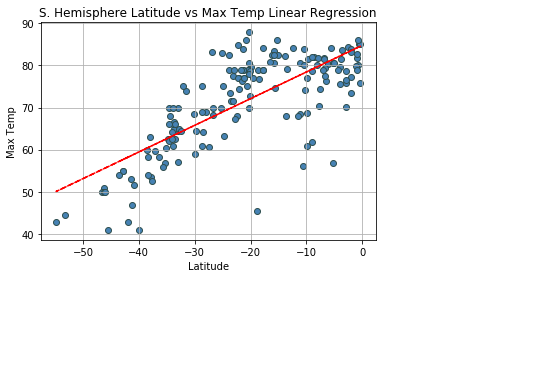

In [55]:
latitude = south_df['Lat']
temp_f = ((south_df['Max Temp']) * 9/5) + 32
result = lin_regress(latitude, temp_f)
w_fit = result['fit']
r_value = result['r']
line_eq = result['line_eq']
print(f"The r-squared is: {r_value**2}")
SLatTempPlot = scatterPlot(latitude, temp_f, "S. Hemisphere Latitude vs Max Temp Linear Regression", "Latitude", "Max Temp")
plt.plot(latitude,w_fit,"--",color="red")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
latitude = north_df['Lat']
humidity = north_df['Humidity']
result = lin_regress(latitude, humidity)
w_fit = result['fit']
r_value = result['r']
line_eq = result['line_eq']
print(f"The r-squared is: {r_value**2}")
NHLatTempPlot = scatterPlot(latitude, humidity, "N. Hemisphere Latitude vs Humidity Linear Regression", "Latitude", "Humidity")
plt.plot(latitude,w_fit,"--",color="red")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
latitude = south_df['Lat']
humidity = south_df['Humidity']
result = lin_regress(latitude, humidity)
w_fit = result['fit']
r_value = result['r']
print(f"The r-squared is: {r_value**2}")
SHLatTempPlot = scatterPlot(latitude, humidity, "S. Hemisphere Latitude vs Humidity Linear Regression", "Latitude", "Humidity")
plt.plot(latitude,w_fit,"--",color="red")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
latitude = north_df['Lat']
clouds = north_df['Cloudiness']
result = lin_regress(latitude, clouds)
w_fit = result['fit']
r_value = result['r']
print(f"The r-squared is: {r_value**2}")
NCLatTempPlot = scatterPlot(latitude, clouds, "N. Hemisphere Latitude vs Cloudiness Linear Regression", "Latitude", "Cloudiness")
plt.plot(latitude,w_fit,"--",color="red")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
latitude = south_df['Lat']
clouds = south_df['Cloudiness']
result = lin_regress(latitude, clouds)
w_fit = result['fit']
r_value = result['r']
print(f"The r-squared is: {r_value**2}")
SCLatTempPlot = scatterPlot(latitude, clouds, "S. Hemisphere Latitude vs Cloudiness Linear Regression", "Latitude", "Cloudiness")
plt.plot(latitude,w_fit,"--",color="red")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
latitude = north_df['Lat']
wind = north_df['Wind Speed']
result = lin_regress(latitude, wind)
w_fit = result['fit']
r_value = result['r']
print(f"The r-squared is: {r_value**2}")
NWLatTempPlot = scatterPlot(latitude, wind, "N. Hemisphere Latitude vs Wind Speed Linear Regression", "Latitude", "Wind Speed")
plt.plot(latitude,w_fit,"--",color="red")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
latitude = south_df['Lat']
wind = south_df['Wind Speed']
result = lin_regress(latitude, wind)
w_fit = result['fit']
r_value = result['r']
print(f"The r-squared is: {r_value**2}")
SWLatTempPlot = scatterPlot(latitude, wind, "S. Hemisphere Latitude vs Wind Speed Linear Regression", "Latitude", "Wind Speed")
plt.plot(latitude,w_fit,"--",color="red")